In [1]:
import keras
keras.__version__

2022-06-13 10:53:27.221579: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-13 10:53:27.242379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 10:53:27.242657: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.0'

In [137]:
import numpy as np
import pandas as pd

df = pd.read_csv('./enter_data_enter.csv')
df = df.sample(frac=1)

In [138]:
x_test  = df.iloc[:,1:]
x_lavel = df.iloc[:,0]

x_test

,0.604938272,0.597639568,0.571007066,0.571162357,0.568677692,0.596785465,0.609441727,0.584051557,0.578305769,0.574578772,...,0.587700908,0.58731268.1,0.587700908.1,0.587623263.2,0.58731268.2,0.587079742.6,0.586924451.3,0.587157388.2,0.587079742.7,0.587390325.1
204,0.486933,0.486933,0.486440,0.486933,0.486193,0.485947,0.485947,0.486193,0.488166,0.486440,...,0.488166,0.489152,0.489645,0.489645,0.489645,0.489398,0.489398,0.489152,0.488905,0.488659
400,0.586031,0.586541,0.585521,0.586286,0.585776,0.584757,0.584757,0.583992,0.585011,0.584757,...,0.513638,0.537344,0.577109,0.616875,0.632934,0.616365,0.593168,0.589090,0.571756,0.531736
128,0.566820,0.567189,0.567189,0.567373,0.567558,0.567189,0.567373,0.567189,0.567742,0.567926,...,0.519263,0.519816,0.521659,0.522765,0.524055,0.525899,0.524977,0.522212,0.522396,0.526820
743,0.424123,0.422145,0.422640,0.422145,0.421651,0.423628,0.423134,0.422640,0.423134,0.422145,...,0.432032,0.433515,0.433020,0.431537,0.431043,0.430054,0.430549,0.430054,0.430549,0.430549
520,0.391892,0.390663,0.388206,0.385135,0.380221,0.377764,0.378993,0.377150,0.375307,0.375307,...,0.192875,0.193489,0.193489,0.193489,0.195332,0.191032,0.191032,0.191646,0.191646,0.192875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0.509108,0.508869,0.508150,0.508869,0.508869,0.509348,0.509827,0.509348,0.511026,0.510547,...,0.449185,0.436961,0.413710,0.422100,0.437919,0.466683,0.498322,0.491611,0.492330,0.494008
654,0.113437,0.137070,0.277515,0.259959,0.185010,0.187711,0.184335,0.187711,0.183660,0.185010,...,0.034436,0.035787,0.044564,0.054018,0.063471,0.066172,0.062120,0.050641,0.043889,0.047265
2,0.071482,0.073716,0.069248,0.069993,0.070737,0.069993,0.071482,0.070737,0.071482,0.072226,...,0.040208,0.040208,0.041698,0.042442,0.044676,0.049144,0.046910,0.045421,0.045421,0.047655
311,0.068915,0.070381,0.071114,0.073314,0.072581,0.070381,0.068915,0.070381,0.068915,0.068915,...,0.028592,0.028592,0.024927,0.023460,0.020528,0.021994,0.022727,0.023460,0.023460,0.024194


In [139]:
_x_test = np.array(x_test)
_x_lavel = np.array(x_lavel)

_x_test.shape

(826, 5120)

In [140]:
from keras.utils import np_utils

x_one_hot = np_utils.to_categorical(x_lavel)
print(f"y:{x_lavel[0]},y_one_hot:{x_one_hot[0]}")
x_one_hot

y:0,y_one_hot:[1. 0.]


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [141]:
from sklearn.model_selection import train_test_split


# 教師データとテストデータに分割
x_train, x_test, y_train, y_test= train_test_split(x_test, x_one_hot, train_size=0.8)

In [161]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD

# モデルの作成
model = Sequential()
model.add(Dense(30, input_dim=5120))# 入力層5120ノード, 隠れ層に2ノード, 全結合
model.add(Activation("sigmoid"))    # 活性化関数 sigmoid relu
model.add(Dense(2))                 # 出力層2ノード,全結合
model.add(Activation("softmax"))    # sigmoid softmax

In [162]:
model.compile(loss="binary_crossentropy",   # 誤差関数 binary_crossentropy categorical_crossentropy
              optimizer=Adam(learning_rate=0.001),     # 最適化手法adam sgd
              metrics=['accuracy'])

In [163]:
# 訓練
# 約数 1　2　4　3221　6442　12884
# 1　2　4　5　8　10　16　20　32　40　64　80　128　160　256　320　512　640　1024　1280　2560　5120
history = model.fit(x_train, y_train, epochs=200, batch_size=32) # 学習

Epoch 1/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7348
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7348
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7348
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7348
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.7348
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7348
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7348
Epoch 8/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7348
Epoch 9/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7348
Epoch 10/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7348
Epoch 11/

21/21 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7591
Epoch 84/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7636
Epoch 85/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7606
Epoch 86/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7606
Epoch 87/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.7621
Epoch 88/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7591
Epoch 89/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7621
Epoch 90/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7621
Epoch 91/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7621
Epoch 92/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7606
Epoch 93/200


21/21 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7742
Epoch 165/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7742
Epoch 166/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7742
Epoch 167/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7758
Epoch 168/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7758
Epoch 169/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7758
Epoch 170/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7758
Epoch 171/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7758
Epoch 172/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7727
Epoch 173/200
21/21 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7758
Epoc

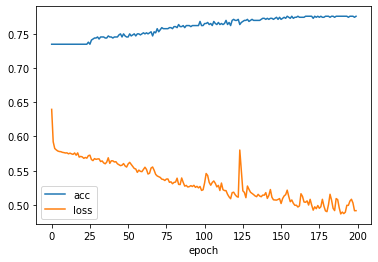

In [164]:
plt.plot(history.epoch, history.history["accuracy"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend()

In [165]:
# 評価
score = model.evaluate(x_test, y_test, verbose=1)

print("Test score", score[0])
print("Test accuracy", score[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6988
Test score 0.6570118069648743
Test accuracy 0.6987951993942261


In [166]:
model.save('enter_model.h5')

In [167]:
import tensorflow as tf
from tensorflow import keras

load_model = keras.models.load_model('enter_model.h5')

load_model.evaluate(x_test, y_test, verbose=1)

6/6 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6988


[0.6570118069648743, 0.6987951993942261]

In [176]:
hoge = load_model.predict(x_test, batch_size=32, verbose=0, steps=None)

for i in range(160):
    if hoge[i][0] >= 0.6:
        print(hoge[i])


[0.717963   0.28203708]
[0.71728754 0.2827124 ]
[0.8484999  0.15150003]
[0.79762185 0.20237805]
[0.818572 0.181428]


In [30]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5103 - acc: 0.7911 - val_loss: 0.4016 - val_acc: 0.8628
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3110 - acc: 0.9031 - val_loss: 0.3085 - val_acc: 0.8870
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2309 - acc: 0.9235 - val_loss: 0.2803 - val_acc: 0.8908
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1795 - acc: 0.9428 - val_loss: 0.2735 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1475 - acc: 0.9526 - val_loss: 0.2788 - val_acc: 0.8890
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1185 - acc: 0.9638 - val_loss: 0.3330 - val_acc: 0.8764
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.1005 - acc: 0.9703 - val_loss: 0.3055 - val_acc: 0.8838
Epoch 8/20
15000/15000 [==============================] - 1s 

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])